## SEC x RMI Project


In [1]:
!pip3 install pandas --user

### Imports

In [2]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

### Burden calculation

#### Initial look at expenditure_bills_burden.csv file

In [4]:
# Load the expenditure_bills_burden.csv file into a pandas DataFrame
expenditure_bills_burden = pd.read_csv('../data/original/expenditure_bills_burden.csv')

In [5]:
# Print column names of the dataframe
print(expenditure_bills_burden.columns)

Index(['parent_name', 'utility_name', 'respondent_id', 'year', 'percent_AMI',
       'ownership', 'electricity_gas_other', 'technology', 'expenditure',
       'bill', 'burden'],
      dtype='object')


In [6]:
# Show first 5 rows of dataframe
expenditure_bills_burden.head(5)

,parent_name,utility_name,respondent_id,year,percent_AMI,ownership,electricity_gas_other,technology,expenditure,bill,burden
0,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,adjustment,9.276270e+06,8.394506,0.009773
1,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,distribution,3.017570e+07,27.307328,0.031792
2,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,hydro,4.312818e+06,3.902860,0.004544
3,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,nuclear,1.912960e+07,17.311221,0.020154
4,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,other,1.578084e+07,14.280782,0.016626


In [7]:
# Show basic statistical details of the dataframe
print(expenditure_bills_burden.describe(include='all'))

              parent_name       utility_name  respondent_id           year  \
count              222720             222720   222720.00000  222720.000000   
unique                 58                116            NaN            NaN   
top     FirstEnergy Corp.  Alabama Power Co.            NaN            NaN   
freq                19200               1920            NaN            NaN   
mean                  NaN                NaN      115.12069    2012.500000   
std                   NaN                NaN       74.08029       4.609783   
min                   NaN                NaN        2.00000    2005.000000   
25%                   NaN                NaN       56.75000    2008.750000   
50%                   NaN                NaN      118.00000    2012.500000   
75%                   NaN                NaN      152.75000    2016.250000   
max                   NaN                NaN      428.00000    2020.000000   

       percent_AMI ownership electricity_gas_other  technology 

#### Initial look at housing_units_income.csv file

In [9]:
# Load the housing_units_income.csv file into a pandas DataFrame
housing_units_income = pd.read_csv('../data/original/housing_units_income.csv')

In [10]:
# Print columns of dataframe
print(housing_units_income.columns)

Index(['parent_name', 'utility_name', 'respondent_id', 'year', 'percent_AMI',
       'ownership', 'housing_units', 'income'],
      dtype='object')


In [11]:
# Print first 5 rows of dataframe
housing_units_income.head(5)

,parent_name,utility_name,respondent_id,year,percent_AMI,ownership,housing_units,income
0,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,92086.710664,9.491514e+08
1,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,renter,126159.321739,1.238083e+09
2,Southern Co.,Alabama Power Co.,2.0,2020,100%+,owner,521425.299562,6.049073e+10
3,Southern Co.,Alabama Power Co.,2.0,2020,100%+,renter,111421.757248,9.494001e+09
4,Southern Co.,Alabama Power Co.,2.0,2020,30-60%,owner,108469.889403,2.541532e+09


In [12]:
# Show basic statistical details of the dataframe
print(housing_units_income.describe(include='all'))

              parent_name       utility_name  respondent_id          year  \
count               18560              18560    18560.00000  18560.000000   
unique                 58                116            NaN           NaN   
top     FirstEnergy Corp.  Alabama Power Co.            NaN           NaN   
freq                 1600                160            NaN           NaN   
mean                  NaN                NaN      115.12069   2012.500000   
std                   NaN                NaN       74.08212      4.609896   
min                   NaN                NaN        2.00000   2005.000000   
25%                   NaN                NaN       56.75000   2008.750000   
50%                   NaN                NaN      118.00000   2012.500000   
75%                   NaN                NaN      152.75000   2016.250000   
max                   NaN                NaN      428.00000   2020.000000   

       percent_AMI ownership  housing_units        income  
count        18

In [13]:
expenditure_df = expenditure_bills_burden[['respondent_id', 'year', 'expenditure', 'percent_AMI', 'technology']]

In [14]:
income_df = housing_units_income[['respondent_id', 'year', 'income', 'percent_AMI']]

In [15]:
# Joining on the utility ID and year
merged_burden_df = pd.merge(expenditure_df, income_df, how='inner', on=['respondent_id', 'year', 'percent_AMI'])
merged_burden_df

,respondent_id,year,expenditure,percent_AMI,technology,income
0,2.0,2020,9.276270e+06,0-30%,adjustment,9.491514e+08
1,2.0,2020,9.276270e+06,0-30%,adjustment,1.238083e+09
2,2.0,2020,3.017570e+07,0-30%,distribution,9.491514e+08
3,2.0,2020,3.017570e+07,0-30%,distribution,1.238083e+09
4,2.0,2020,4.312818e+06,0-30%,hydro,9.491514e+08
...,...,...,...,...,...,...
445435,428.0,2005,1.093298e+05,80-100%,transmission,5.083671e+07
445436,428.0,2005,3.647324e+05,80-100%,Gas,1.343656e+08
445437,428.0,2005,3.647324e+05,80-100%,Gas,5.083671e+07
445438,428.0,2005,3.564423e+05,80-100%,Other Fuel,1.343656e+08


In [16]:
grouped_burden_df = merged_burden_df.groupby(['respondent_id', 'year', 'percent_AMI', 'technology'])\
                                .agg({'expenditure': ['sum'], 'income': ['sum']})\
                                .reset_index()

In [17]:
grouped_burden_df.columns = ['respondent_id', 'year', 'percent_AMI', 'technology', 'sum_expenditure', 'sum_income']
grouped_burden_df.columns

Index(['respondent_id', 'year', 'percent_AMI', 'technology', 'sum_expenditure',
       'sum_income'],
      dtype='object')

In [18]:
# Adding a column for the burden calculation
grouped_burden_df['burden'] = grouped_burden_df['sum_expenditure']/grouped_burden_df['sum_income']

In [19]:
# Print unique utility IDs
print(grouped_burden_df['respondent_id'].unique())

[  2.   3.   6.   7.   8.   9.  10.  11.  17.  19.  22.  23.  27.  30.
  32.  36.  39.  40.  41.  42.  43.  44.  45.  46.  49.  51.  54.  55.
  56.  57.  59.  61.  62.  70.  73.  74.  77.  79.  80.  81.  82.  83.
  84.  88.  89.  93.  95.  96.  98.  99. 100. 101. 105. 107. 108. 114.
 115. 117. 119. 120. 121. 122. 123. 126. 127. 130. 131. 132. 133. 134.
 135. 136. 137. 138. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149.
 150. 151. 152. 155. 157. 159. 161. 163. 164. 166. 167. 170. 175. 176.
 177. 179. 181. 186. 187. 188. 191. 192. 193. 194. 195. 202. 210. 281.
 288. 290. 403. 428.]


In [20]:
grouped_burden_df.head(24)

,respondent_id,year,percent_AMI,technology,sum_expenditure,sum_income,burden
0,2.0,2005,0-30%,Gas,1.832905e+08,3.001005e+09,0.061076
1,2.0,2005,0-30%,Other Fuel,3.484668e+06,3.001005e+09,0.001161
2,2.0,2005,0-30%,adjustment,4.456437e+06,3.001005e+09,0.001485
3,2.0,2005,0-30%,distribution,6.567577e+07,3.001005e+09,0.021885
4,2.0,2005,0-30%,hydro,1.164797e+07,3.001005e+09,0.003881
5,2.0,2005,0-30%,nuclear,3.729100e+07,3.001005e+09,0.012426
6,2.0,2005,0-30%,other,4.345116e+07,3.001005e+09,0.014479
7,2.0,2005,0-30%,other_fossil,5.404809e+07,3.001005e+09,0.018010
8,2.0,2005,0-30%,purchased_power,5.847944e+07,3.001005e+09,0.019487
9,2.0,2005,0-30%,renewables,0.000000e+00,3.001005e+09,0.000000


In [21]:
print(grouped_burden_df.describe(include='all'))

        respondent_id           year percent_AMI technology  sum_expenditure  \
count   111360.000000  111360.000000      111360     111360     1.113600e+05   
unique            NaN            NaN           5         12              NaN   
top               NaN            NaN       0-30%        Gas              NaN   
freq              NaN            NaN       22272       9280              NaN   
mean       115.120690    2012.500000         NaN        NaN     4.561883e+07   
std         74.080456       4.609793         NaN        NaN     1.494183e+08   
min          2.000000    2005.000000         NaN        NaN    -2.617367e+09   
25%         56.750000    2008.750000         NaN        NaN     0.000000e+00   
50%        118.000000    2012.500000         NaN        NaN     6.004265e+06   
75%        152.750000    2016.250000         NaN        NaN     3.532157e+07   
max        428.000000    2020.000000         NaN        NaN     4.564462e+09   

          sum_income         burden  
c

#### Exploring the assets_earnings_investments.csv file

In [22]:
# Load the assets_earnings_investments.csv file into a pandas dataframe
investments_df = pd.read_csv('../data/original/assets_earnings_investments.csv') 

In [23]:
# Print first 5 rows
print(investments_df.head(5))

                         parent_name        utility_name  respondent_id  year  \
0  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   
1  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   
2  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   
3  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   
4  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   

   asset                           sub_asset  asset_value  earnings_value  \
0  other                                AROs  -15405378.0            -0.0   
1  other  electric_plant_held_for_future_use    1034099.0             0.0   
2  other     electric_plant_leased_to_others  155616036.0             0.0   
3  other                       general_plant     427318.0             0.0   
4  other                    intangible_plant     724784.0             0.0   

   investment_value  
0               NaN  
1     

In [24]:
print(investments_df.describe(include='all'))

                              parent_name              utility_name  \
count                               52136                     52136   
unique                                111                       283   
top     American Electric Power Co., Inc.  Dominion Energy Virginia   
freq                                 4038                       498   
mean                                  NaN                       NaN   
std                                   NaN                       NaN   
min                                   NaN                       NaN   
25%                                   NaN                       NaN   
50%                                   NaN                       NaN   
75%                                   NaN                       NaN   
max                                   NaN                       NaN   

        respondent_id          year  asset            sub_asset   asset_value  \
count    52136.000000  52136.000000  52136                52136  5

#### Data processing takeaways:
Seems like there are 283 unique utility names for the `assets_earnings_investments.csv` file but only 116 for `expenditure_bills_burden.csv` file?

In [4]:
utilities = investments_df['utility_name'].unique()
print(sorted(utilities)[:10])  # print first 10 utility names

['4C Acquisition, LLC', 'AEP Appalachian Transmission Co., Inc.', 'AEP Generating Co.', 'AEP Generation Resources Inc.', 'AEP Indiana Michigan Transmission Co., Inc.', 'AEP Kentucky Transmission Co., Inc.', 'AEP Ohio Transmission Co., Inc.', 'AEP Oklahoma Transmission Co., Inc.', 'AEP Southwestern Transmission Co., Inc.', 'AEP Texas Central Co.']


In [24]:
np.count_nonzero(utilities)  # 283 total unique utilitie names

283

In [25]:
investments_df.loc[: , 'utility_name'].value_counts()

Dominion Energy Virginia                          498
Georgia Power Co.                                 487
Alabama Power Co.                                 476
Southern California Edison Co.                    476
Pacific Gas & Electric Co.                        463
                                                 ... 
Citizens Sycamore-Penasquitos Transmission LLC      6
Hagerstown Light Department                         6
Horizon West Transmission, LLC                      6
Pinnacle West Marketing & Trading Co. LLC           5
Wilderness Line Holdings, LLC                       4
Name: utility_name, Length: 283, dtype: int64

In [27]:
filt = (investments_df['utility_name'] == 'AEP Generating Co.')

In [28]:
# testing on the utility "AEP Generating Co."
aep = investments_df.loc[filt]

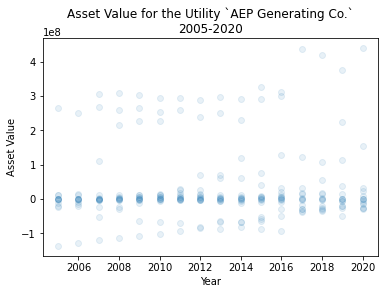

In [29]:
plt.figure() 
plt.title('Asset Value for the Utility `AEP Generating Co.`\n2005-2020') 
                                     
plt.scatter(aep['year']
            ,aep['asset_value']
            ,alpha=0.1
           )
plt.xlabel('Year')
plt.ylabel('Asset Value');

#### Deep dive into nuclear asset investments

In [27]:
nuclear=investments_df.loc[(investments_df['asset']=='nuclear')]
nuclear=nuclear.drop(columns=['sub_asset','respondent_id','asset_value', 'earnings_value','parent_name','asset'])
nuclear

,utility_name,year,investment_value
242,Alabama Power Co.,2020,129059811.0
273,Alabama Power Co.,2019,59700604.0
304,Alabama Power Co.,2018,104170820.0
335,Alabama Power Co.,2017,79121368.0
366,Alabama Power Co.,2016,94585351.0
...,...,...,...
51461,"Entergy Louisiana, LLC",2019,298466290.0
51482,"Entergy Louisiana, LLC",2018,120892141.0
51502,"Entergy Louisiana, LLC",2017,242376087.0
51522,"Entergy Louisiana, LLC",2016,369484426.0


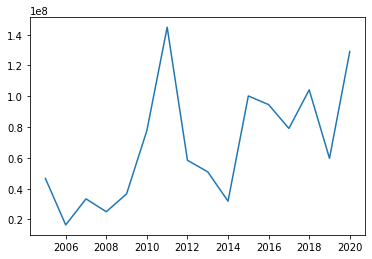

In [29]:
coal = investments_df.loc[(investments_df['asset']=='steam')]
coal= coal.drop(columns=['asset','sub_asset','respondent_id','parent_name','asset_value', 'earnings_value'])
nuclearplot=nuclear.loc[(nuclear['utility_name']=='Alabama Power Co.')]
plt.plot(nuclearplot['year'], nuclearplot['investment_value'])